In [2]:
import openai 
import os

openai.api_key = os.getenv("OPENAI_API_KEY")


In [4]:
import pandas as pd

# Read in the data
pop_data = pd.read_csv('../data/processed/API_SP_POP_TOTL_DS2.csv', skiprows=4)
pop_data = pop_data.rename(columns={'2020': 'pop_2020'})



In [5]:
pop_data 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,pop_2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,NaN


<AxesSubplot: xlabel='Country Name'>

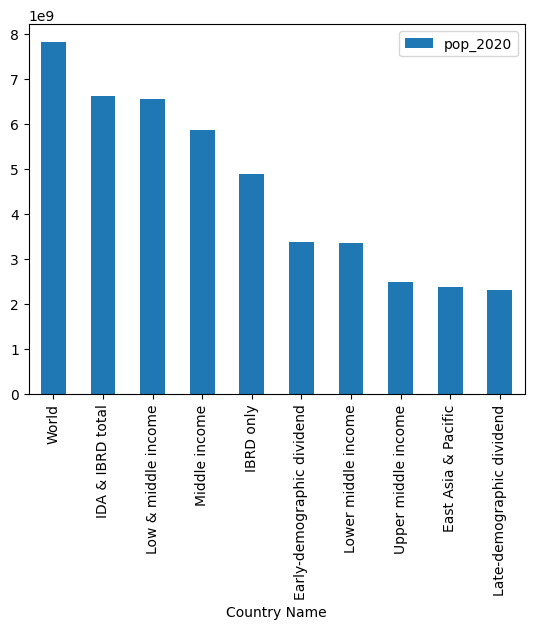

In [6]:
# plot the data for the top 10 countries with the highest population
pop_data.nlargest(10, 'pop_2020').plot(x='Country Name', y='pop_2020', kind='bar')


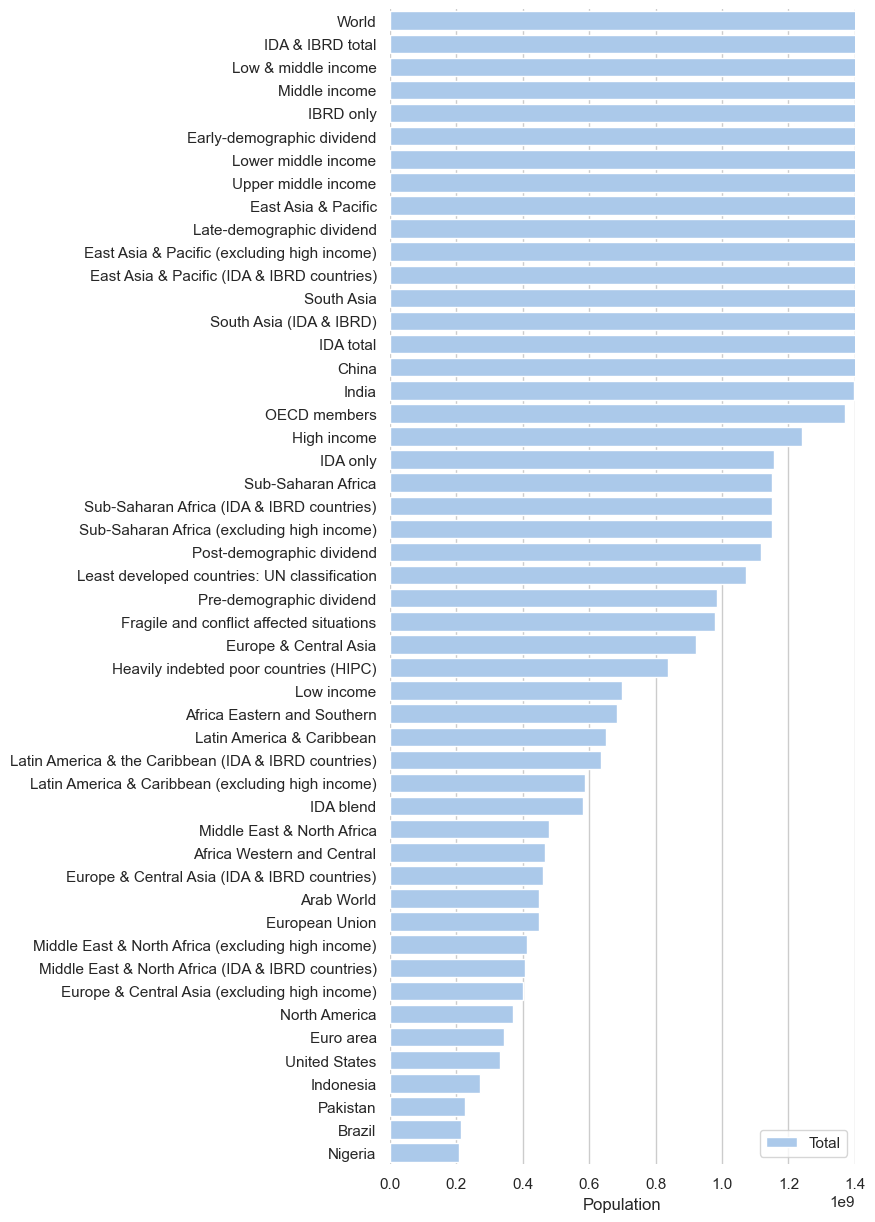

In [7]:
# reproduce the plot above using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="pop_2020", y="Country Name", data=pop_data.nlargest(50, 'pop_2020'),
            label="Total", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1400000000), ylabel="", xlabel="Population")
sns.despine(left=True, bottom=True)


<AxesSubplot: xlabel='Country Name'>

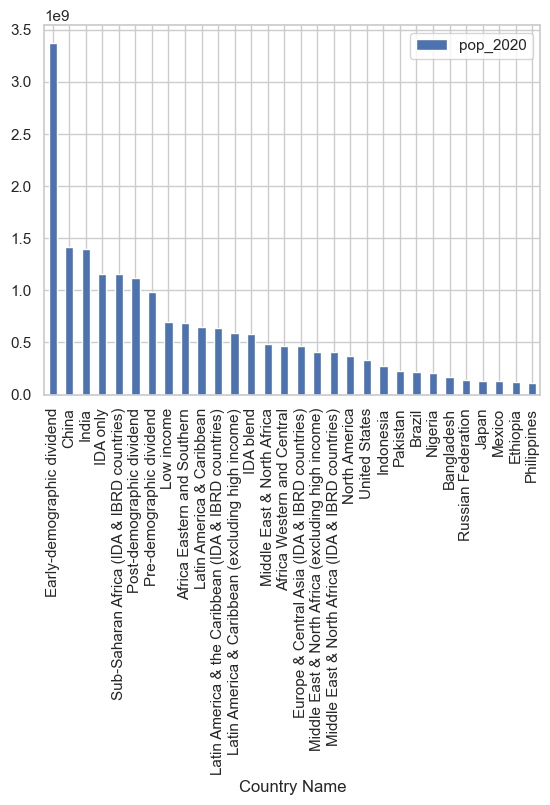

In [8]:
# Only include countries 
pop_data = pop_data[pop_data['Country Code'].str.contains('WLD') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('ARB') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('CSS') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('CEB') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('EAP') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('EAS') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('ECA') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('ECS') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('EMU') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('EUU') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('FCS') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('HPC') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('HIC') == False]


pop_data = pop_data[pop_data['Country Code'].str.contains('LMC') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('UMC') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('LTE') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('TEA') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('SAS') == False]

pop_data = pop_data[pop_data['Country Code'].str.contains('IBT') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('LMY') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('MIC') == False]

pop_data = pop_data[pop_data['Country Code'].str.contains('TSA') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('EAsR') == False]
pop_data = pop_data[pop_data['Country Code'].str.contains('IBD') == False]

pop_data = pop_data[pop_data['Country Code'].str.contains('IDA') == False]

pop_data = pop_data[pop_data['Country Code'].str.contains('OED') == False]


pop_data = pop_data[pop_data['Country Code'].str.contains('SSF') == False]

pop_data = pop_data[pop_data['Country Code'].str.contains('SSA') == False]

pop_data = pop_data[pop_data['Country Code'].str.contains('LDC') == False]

# plot the data for the top 10 countries with the highest population
pop_data.nlargest(30, 'pop_2020').plot(x='Country Name', y='pop_2020', kind='bar')


<AxesSubplot: xlabel='Country Code'>

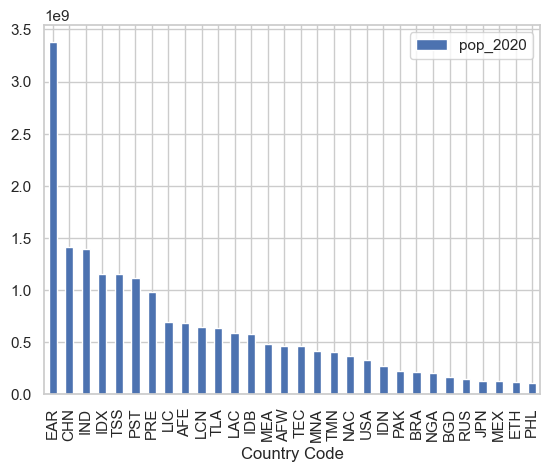

In [9]:
# plot the data for the top 10 countries with the highest population
pop_data.nlargest(30, 'pop_2020').plot(x='Country Code', y='pop_2020', kind='bar')

In [12]:
from datasets import list_datasets, load_dataset

# Print all the available datasets
print(list_datasets())

# Load a dataset and print the first example in the training set
squad_dataset = load_dataset('squad')
print(squad_dataset['train'][0])

# Process the dataset - add a column with the length of the context texts
dataset_with_length = squad_dataset.map(lambda x: {"length": len(x["context"])})

# Process the dataset - tokenize the context texts (using a tokenizer from the 🤗 Transformers library)
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

tokenized_dataset = squad_dataset.map(lambda x: tokenizer(x['context']), batched=True)

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews', 'allocine', 'alt', 'amazon_polarity', 'amazon_reviews_multi', 'amazon_us_reviews', 'ambig_qa', 'americas_nli', 'ami', 'amttl', 'anli', 'app_reviews', 'aqua_rat', 'aquamuse', 'ar_cov19', 'ar_res_reviews', 'ar_sarcasm', 'arabic_billion_words', 'arabic_pos_dialect', 'arabic_speech_corpus', 'arcd', 'arsentd_lev', 'art', 'arxiv_dataset', 'ascent_kb', 'aslg_pc12', 'asnq', 'asset', 'assin', 'assin2', 'atomic', 'autshumato', 'babi_qa', 'banking77', 'bbaw_egyptian', 'bbc_hindi_nli', 'bc2gm_corpus', 'beans', 'best2009', 'bianet', 'bible_para', 'big_patent', 'billsum', 'bing_coronavirus_query_set', 'biomrc', 'biosses', 'blbooks', 'blbooksgenre', 'blended_skill_talk', 'blimp', 'blog_authorship_corpus', 'bn_hate_speech', 'bnl_newspapers', 'bookcorpus', 'bookcorpusopen', 'boolq', 'bprec', 'break_data', 'brwac', 'bsd_ja_en', 'bswac'

100%|██████████| 2/2 [00:00<00:00, 130.36it/s]


{'id': '5733be284776f41900661182', 'title': 'University_of_Notre_Dame', 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.', 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?', 'answers': {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}}


Map:  38%|███▊      | 4000/10570 [00:00<00:01, 4209.73 examples/s]Token indices sequence length is longer than the specified maximum sequence length for this model (627 > 512). Running this sequence through the model will result in indexing errors
